In [1]:
import sys
sys.path.append('../')
import env

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
def create_base_dataframe():
    df = pd.DataFrame(columns=(['{0:02d}'.format(i*10) for i in range(env.AREA_ONE_LENGTH())]))
    return df

def create_empty_base():
    zeros = np.zeros(env.MAX_AREA_COUNT())
    df = pd.DataFrame(zeros, columns=(['{0:02d}'.format(i*10) for i in range(env.AREA_ONE_LENGTH())]))
    df = df.sort_index(ascending=False)
    return df

In [4]:
create_base_dataframe()

,00,10,20,30,40,50,60,70,80


In [5]:
# エリア番号を線形的な数から、iとjで回した数のようにする
def convert_area_to_contour(base, read):
    for r in np.asanyarray(read):
        area_id = int(r[1])
        row = str(area_id // env.AREA_ONE_LENGTH())
        col = str(area_id % env.AREA_ONE_LENGTH()) + '0'
        base.loc[row, col] = r[2]
        
    return base

In [6]:
csv_array = {}
def main(args, array):
    base = create_base_dataframe()
    df = pd.read_csv(env.get_full_path('2D', args),
                                                        encoding='Shift_JISx0213')
    df['time'] = df['time'].apply(lambda x: str(int(x)))

    group_list = df.groupby(['time'], sort=False)
    for _times, _group in group_list:
        df = convert_area_to_contour(base.copy(), _group.copy())
        df = df.sort_index(ascending=False)
        array[args.dir][args.ratio][args.seed][args.csv][_times] = df
        
env.for_default_init(main, csv_array)

In [7]:
def create_contour(time_number, file_name=False):
    times_list = env.TIMES_LIST()
    time = times_list[time_number]
    print(time)
    df = csv_array[people][ratio][seed][csv][time].copy()
    
    plt.figure(figsize=(9,6))
    if file_name:
        plt.figure(figsize=(9,6), dpi=600)
        
#     sns.heatmap(df, annot=True, fmt='.0f', cmap='RdYlGn_r',
#                vmax=df.sum().mean(), vmin=0)
    sns.heatmap(df, annot=True, fmt='.0f', cmap='RdYlGn_r')
    if file_name:
        plt.savefig('{0}.png'.format(file_name))
        
    print(df.sum().sum())

In [8]:
def create_contour_base(df, file_name=False):
    plt.figure(figsize=(9,6))
    if file_name:
        plt.figure(figsize=(9,6), dpi=600)
        
    sns.heatmap(df, annot=True, fmt='.0f', cmap='RdYlGn_r',
               vmax=df.sum().mean(), vmin=0)
    if file_name:
        plt.savefig('{0}.png'.format(file_name))

In [26]:
people = 'p30000'
ratio = 'r6'
seed = 's123'
csv = 'mobile'

# コンター図

3600
1290.0


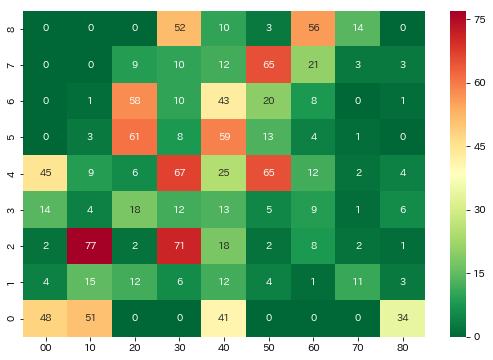

In [30]:
create_contour(0)

7200
3626.0


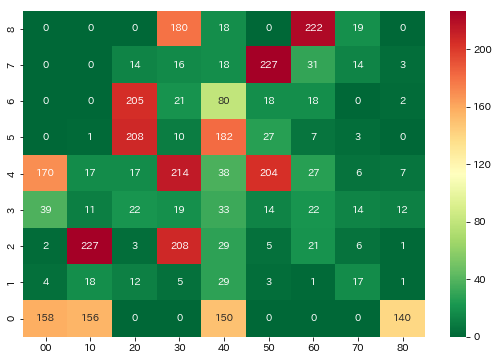

In [31]:
create_contour(1)

10800
4609.0


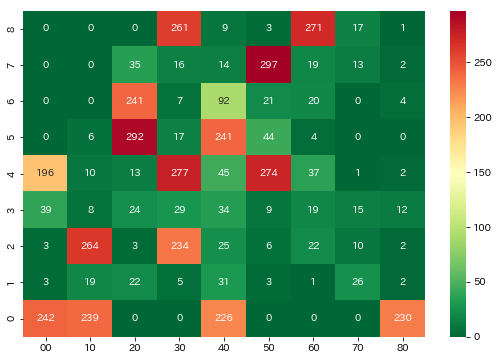

In [32]:
create_contour(2)

14400
4435.0


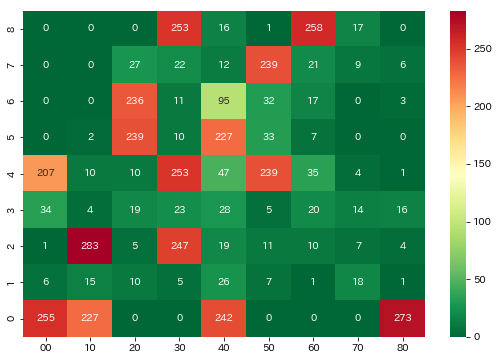

In [33]:
create_contour(3)

18000
3793.0


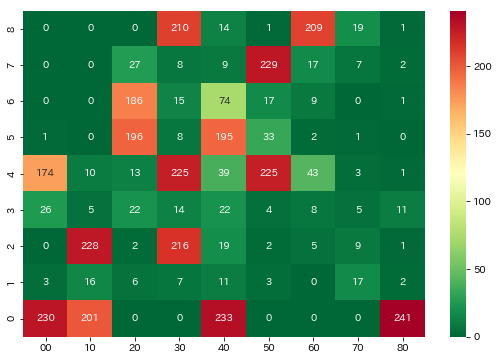

In [34]:
create_contour(4)

21600
2458.0


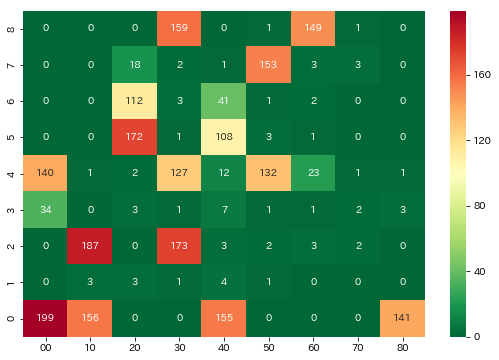

In [35]:
create_contour(5)

20211.0


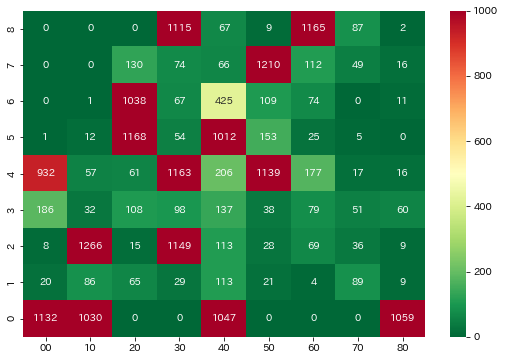

In [36]:
df_new = csv_array[people][ratio][seed][csv]['3600'].copy()
for _times in env.TIMES_LIST():
    if _times != '3600':
        df_new += csv_array[people][ratio][seed][csv][_times].copy()

print(df_new.sum().sum())
plt.figure(figsize=(9,6))
sns.heatmap(df_new, annot=True, fmt='.0f', cmap='RdYlGn_r',
           vmax=1000, vmin=0)
    
# create_contour(df_new, '{0}seed{1}_{2}'.format(people, seed, csv))